Instruccinones

Detección de anomalías en el uso de la CPU

Detección de anomalías significa identificar eventos inesperados en un proceso. Significa detectar amenazas a nuestros sistemas que pueden causar daños en términos de seguridad y fuga de información importante, pero la importancia de la detección de anomalías no se limita a la seguridad. Los datos de este proyecto se basan en métricas por minuto de la utilización de la CPU del host.

Paso 1:

En Machine Learning, el modelo ARIMA es generalmente una clase de modelos estadísticos que brindan resultados que dependen linealmente de sus valores anteriores en la combinación de factores estocásticos.

Necesitamos visualizar los datos para analizar las tendencias, las estacionalidades y los ciclos.

Comenzaremos importando las bibliotecas necesarias.

PD: La solucion presentada es parte de lo aprendido en clases del bootcamp, no es una reproduccion

In [194]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install shutil
#!pip install sqlalchemy
#!pip install plotly
#!pip install pmdarima

In [195]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#advertencias
import warnings
warnings.filterwarnings('ignore')

#Visualizacion de las columnas
pd.set_option('display.max_columns', None)

In [196]:
#Dataset links:

cpu_train_a =  pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv')

cpu_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv')

cpu_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv')

cpu_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv')

In [197]:
cpu_test_a.shape

(60, 2)

In [198]:
cpu_test_a.sample(5)

,datetime,cpu
36,2017-01-28 02:18:00,1.08
4,2017-01-28 01:46:00,1.81
35,2017-01-28 02:17:00,1.05
44,2017-01-28 02:26:00,1.00
17,2017-01-28 01:59:00,1.56


In [199]:
cpu_test_a.isnull().sum()

datetime    0
cpu         0
dtype: int64

In [200]:
cpu_test_b.shape

(60, 2)

In [201]:
cpu_test_b.isnull().sum()

datetime    0
cpu         0
dtype: int64

In [202]:
cpu_test_b.sample(5)

,datetime,cpu
4,2017-01-28 04:46:00,1.61
22,2017-01-28 05:04:00,0.07
10,2017-01-28 04:52:00,1.53
42,2017-01-28 05:24:00,1.41
57,2017-01-28 05:39:00,2.11


In [203]:
df_test = pd.concat([cpu_test_a,cpu_test_b], axis=0)

In [204]:
df_test.head()

,datetime,cpu
0,2017-01-28 01:42:00,2.19
1,2017-01-28 01:43:00,1.97
2,2017-01-28 01:44:00,2.15
3,2017-01-28 01:45:00,1.94
4,2017-01-28 01:46:00,1.81


In [205]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  120 non-null    object 
 1   cpu       120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [206]:
df_test.sample(5)

,datetime,cpu
52,2017-01-28 02:34:00,0.83
8,2017-01-28 04:50:00,1.30
6,2017-01-28 04:48:00,1.43
54,2017-01-28 02:36:00,0.74
18,2017-01-28 05:00:00,0.05


In [207]:
df_test.isna().sum()

datetime    0
cpu         0
dtype: int64

In [208]:
df_test.dropna

<bound method DataFrame.dropna of                datetime   cpu
0   2017-01-28 01:42:00  2.19
1   2017-01-28 01:43:00  1.97
2   2017-01-28 01:44:00  2.15
3   2017-01-28 01:45:00  1.94
4   2017-01-28 01:46:00  1.81
..                  ...   ...
55  2017-01-28 05:37:00  2.55
56  2017-01-28 05:38:00  2.23
57  2017-01-28 05:39:00  2.11
58  2017-01-28 05:40:00  2.17
59  2017-01-28 05:41:00  2.15

[120 rows x 2 columns]>

In [209]:
cpu_train_a.sample(5)

,datetime,cpu
408,2017-01-28 01:30:00,2.19
415,2017-01-28 01:37:00,2.41
267,2017-01-27 23:09:00,1.50
89,2017-01-27 20:11:00,1.79
346,2017-01-28 00:28:00,0.70


In [210]:
cpu_train_a.shape

(420, 2)

In [211]:
cpu_train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [212]:
cpu_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [213]:
cpu_train_b.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [214]:
cpu_train_b.shape

(600, 2)

In [215]:
df_train = pd.concat([cpu_train_a,cpu_train_b], axis=0)

In [216]:
df_train.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1020 non-null   object 
 1   cpu       1020 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.9+ KB


In [218]:
df_train.isnull().sum()

datetime    0
cpu         0
dtype: int64

In [219]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1020 non-null   object 
 1   cpu       1020 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.9+ KB


In [220]:
df_train.shape

(1020, 2)

Usaremos ARIMA como modelo Autoregresivo, 


In [221]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train =  df_train.set_index('datetime')
df_train.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


Graficaremos la variable en estudio que son los registros de cpu

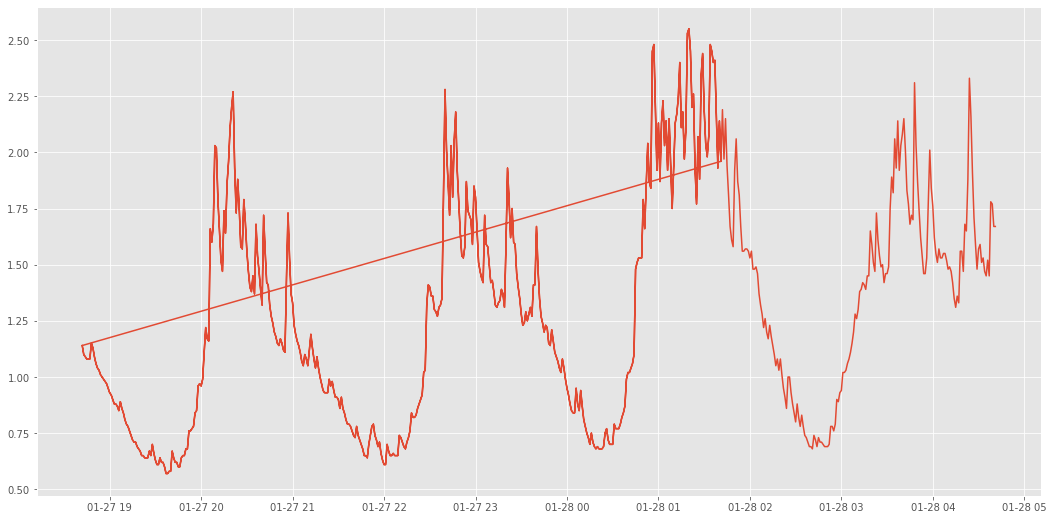

In [222]:
plt.figure(figsize=(18,9))
plt.plot(df_train.index, df_train['cpu'], linestyle = "-")
plt.xlabel = ('Dates')
plt.ylabel = ('registros_cpu')
plt.show()

In [223]:
df_train.resample('D').mean()

,cpu
datetime,
2017-01-27,1.142579
2017-01-28,1.460755


Hare el modelo de la clase aca

In [224]:
df_train['rolling_sum'] = df_train.rolling(3).sum()
df_train.head(10)

,cpu,rolling_sum
datetime,,
2017-01-27 18:42:00,1.14,NaN
2017-01-27 18:43:00,1.10,NaN
2017-01-27 18:44:00,1.09,3.33
2017-01-27 18:45:00,1.08,3.27
2017-01-27 18:46:00,1.08,3.25
2017-01-27 18:47:00,1.08,3.24
2017-01-27 18:48:00,1.15,3.31
2017-01-27 18:49:00,1.13,3.36
2017-01-27 18:50:00,1.09,3.37


La siguiente es una buena oportunidad para ver cómo podemos reenviar o rellenar datos cuando trabajamos con valores de datos faltantes.

In [225]:
df_train['rolling_sum_backfilled'] = df_train['rolling_sum'].fillna(method = 'backfill')
df_train.head()

,cpu,rolling_sum,rolling_sum_backfilled
datetime,,,
2017-01-27 18:42:00,1.14,NaN,3.33
2017-01-27 18:43:00,1.10,NaN,3.33
2017-01-27 18:44:00,1.09,3.33,3.33
2017-01-27 18:45:00,1.08,3.27,3.27
2017-01-27 18:46:00,1.08,3.25,3.25


PD: Suele ser útil poder completar los datos que faltan con valores realistas, como el promedio de un período de tiempo, pero recuerde siempre que si está trabajando con un problema de serie temporal y desea que sus datos sean realistas, no debe realizar un relleno. de tus datos


Nuestro índice es en realidad solo una lista de cadenas que parecen una fecha, por lo que debemos ajustarlas para que sean marcas de tiempo, de esa manera nuestro análisis de pronóstico podrá interpretar estos valores.

In [226]:
df_train.index = pd.to_datetime(df_train.index)

In [227]:
#!pip install chart_studio cufflinks statsmodels

In [228]:
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt

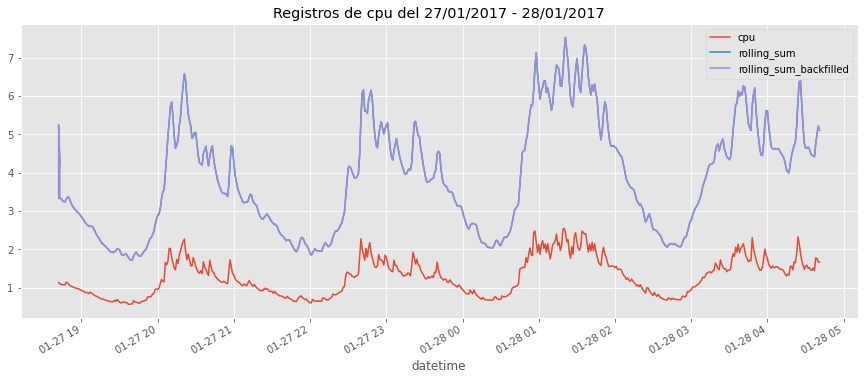

In [229]:
df_train.plot(title = 'Registros de cpu del 27/01/2017 - 28/01/2017', figsize=(15,6))
plt.show()

Podemos observar datos estacionales, con una ligera tendencia creciente, a su vez se observa la misma estacionalidad en los datos rolling_sum_backfilled que son los creados y completados por nosotros. por lo que existe una tendencia creciente positiva ligera.

In [230]:
import statsmodels.api as sm
from pylab import rcParams


In [231]:
df_train_1.sample()

,cpu,rolling_sum,rolling_sum_backfilled
datetime,,,
2017-01-27 23:37:00,1.27,3.86,3.86


In [232]:
df_train_1.index = pd.to_datetime(df_train_1.index)

In [233]:
df_train_1.head()

,cpu,rolling_sum,rolling_sum_backfilled
datetime,,,
2017-01-27 18:42:00,1.14,NaN,3.33
2017-01-27 18:43:00,1.10,NaN,3.33
2017-01-27 18:44:00,1.09,3.33,3.33
2017-01-27 18:45:00,1.08,3.27,3.27
2017-01-27 18:46:00,1.08,3.25,3.25


In [234]:
#!pip install pmdarima

In [235]:
from pmdarima.arima import auto_arima

Intentaremos nuevamente con la data en crudo

In [236]:
data = pd.concat([cpu_train_a,cpu_train_b, cpu_test_a, cpu_test_b], axis=0)

In [237]:
data['datetime'] = pd.to_datetime(data['datetime'])
data =  data.set_index('datetime')
data.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [238]:
data.sample(5)

,cpu
datetime,
2017-01-28 03:16:00,1.39
2017-01-27 22:39:00,1.80
2017-01-28 00:58:00,2.20
2017-01-28 04:08:00,1.55
2017-01-27 20:25:00,1.75


<AxesSubplot:title={'center':'Registros de cpu '}, xlabel='datetime'>

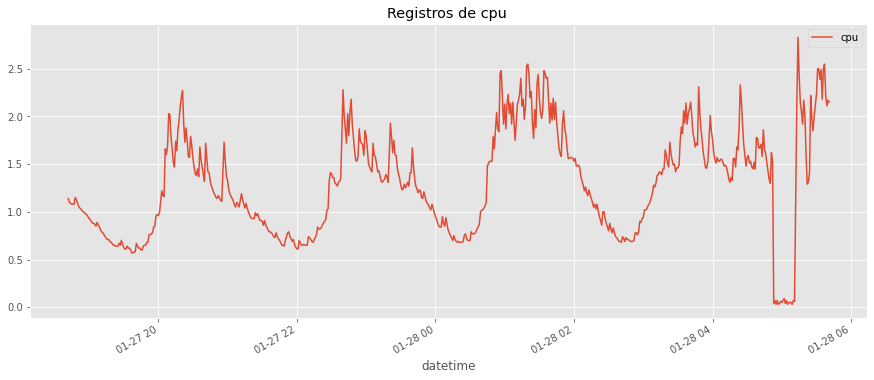

In [239]:
data.plot(title="Registros de cpu ", figsize=(15,6))

In [240]:
exogenous_feature = ['rolling_sum_backfilled']

In [241]:
model = auto_arima(df_train_1.cpu, exogenous = df_train_1[exogenous_feature],
trace = True, error_action = 'ignore', suppress_warnings=True)
model.fit(df_train_1.cpu, exogenous_feature = df_train_1[exogenous_feature])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2168.512, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1950.152, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2073.789, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2154.976, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1951.821, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2170.485, Time=1.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2164.229, Time=1.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2162.573, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-2166.493, Time=1.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-2164.928, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2162.098, Time=1.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-2170.678, Time=1.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-2177.413, Time=2.99 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2170.079, Time=1.81 sec
 ARIMA(4,0,3)(0,0,0

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

el modelo ARIMA mas adecuado es ARIMA(3,0,3) que tienenel AIC mas bajo

In [242]:
train = data.loc['2017-01-27 00:00:00':'2017-01-27 23:59:00']

In [243]:
test = data.loc['2017-01-28 00:00:00':'2017-01-28 23:59:00']

In [244]:
model.fit(train)

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

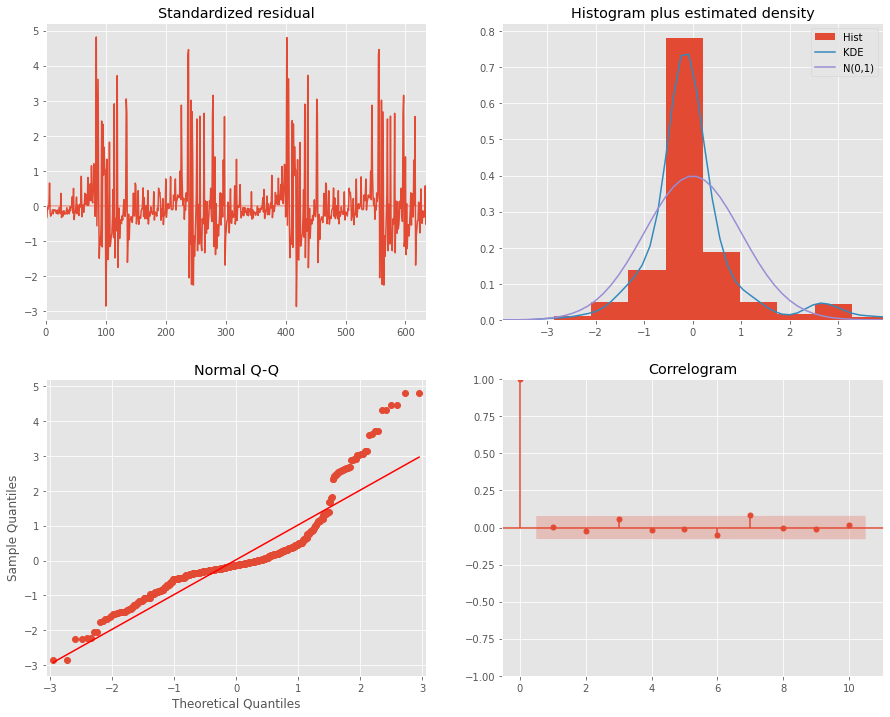

In [245]:
model.fit(train).plot_diagnostics(figsize=(15, 12))
plt.show()

plot_diagnostics nos permite generar rapidamente diagnostico y el comportamiento de los datos

In [246]:
model.fit(train)

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [247]:
future_forecast = model.predict(n_periods=504)

Crearemos un marco de datos que contenga nuestro pronostico futuro y los conectamos con los datos originales

<AxesSubplot:xlabel='datetime'>

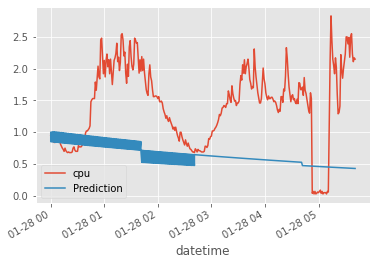

In [248]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [251]:
#pd.concat([data,future_forecast],axis=1).plot()

Lo intente muchas veces y no logre que corriera correctamente con las predicciones, sigo practicando.